In [1]:
%matplotlib inline

In [2]:
import csv
import os
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



In [4]:
# CONF = 'conf_bdlmapper_v1'
# CONF = 'conf_halfmapper_v2'
CONF = 'conf_demapper_v1_binning'

In [5]:
import os
basedir = '/Users/dh/workspace/BDL/neurolens/experiments/cme_shine375/CME_mapper2d_data'

if os.path.isdir('/scratch'):
    basedir = '/scratch/groups/saggar/mapper/experiments/cme_shine375/CME_mapper2d_data'

files = []
for fname in os.listdir(basedir):
#     if fname.startswith('SBJ') and fname.endswith(CONF):
    if fname.startswith(CONF) and fname.endswith('.csv'):
        sbjid = fname.split('_')[2].replace('.csv', '')
        filepath = os.path.join(basedir, fname)
        if os.path.isfile(filepath):
            files.append((fname, filepath))
files = sorted(files)

In [6]:

# header = None
# with open(os.path.join(basedir, 'halfmapper_header.csv')) as f:
#     for row in csv.reader(f):
#         header = row

results = []
for fname, fpath in files: # Or only selected_files
    print(fname)
    with open(fpath) as f:
        for row in csv.DictReader(f):
            R = {}
#             for k,v in zip(header,row):
            for k,v in row.items():
                try:
                    R[k] = float(v)
                except:
                    R[k] = v;
            results.append(R)
        


# outdir = os.path.join(basedir, 'hparams')
# os.makedirs(outdir, exist_ok=True)

# alpha_add = 1 if 'alpha' in header else 0
# HPARAMS = [h for h in ['R', 'K', 'G'] if h in header]
# HPARAMS_START = len(HPARAMS)
# HPARAMS_PLOTS = [4+alpha_add,6,5]

# assert len(header) == HPARAMS_START + sum(HPARAMS_PLOTS)

conf_demapper_v1_binning_res_SBJ01.csv
conf_demapper_v1_binning_res_SBJ02.csv
conf_demapper_v1_binning_res_SBJ03.csv
conf_demapper_v1_binning_res_SBJ04.csv
conf_demapper_v1_binning_res_SBJ06.csv
conf_demapper_v1_binning_res_SBJ07.csv
conf_demapper_v1_binning_res_SBJ08.csv
conf_demapper_v1_binning_res_SBJ09.csv
conf_demapper_v1_binning_res_SBJ10.csv
conf_demapper_v1_binning_res_SBJ12.csv
conf_demapper_v1_binning_res_SBJ13.csv
conf_demapper_v1_binning_res_SBJ14.csv
conf_demapper_v1_binning_res_SBJ15.csv
conf_demapper_v1_binning_res_SBJ16.csv
conf_demapper_v1_binning_res_SBJ17.csv
conf_demapper_v1_binning_res_SBJ18.csv
conf_demapper_v1_binning_res_SBJ19.csv
conf_demapper_v1_binning_res_SBJ20.csv


In [16]:
import math

df = pd.DataFrame(results)

# df['k'] = df.apply(lambda row: math.ceil(row['ac_pick'] * row['knnparam_gain']), axis=1)
# df = df.drop_duplicates()
# df['hrf_comp'] = df.apply(lambda row: row['knnparam'] > 10, axis=1)
# df

df['knnparam'] = df.apply(lambda row: math.ceil(row['ac_pick'] * row['knnparam_gains']), axis=1)
df = df.drop_duplicates()

In [18]:
df_knnparam = df[['sbj', 'ac_pick']].drop_duplicates()
df_knnparam

,sbj,ac_pick
0,SBJ01,6.0
224,SBJ02,6.0
448,SBJ03,6.0
672,SBJ04,5.0
896,SBJ06,6.0
1120,SBJ07,5.0
1344,SBJ08,6.0
1568,SBJ09,6.0
1792,SBJ10,6.0
2016,SBJ12,6.0


In [19]:
df

,sbj,idx,ac_pick,preprocess_types,dist_types,rknn_types,rknn_directed,knnparam_gains,embed_types,embed_dims,embed_perplexity,embed_kparam_gain,preembed_mod_full,preembed_mod_wout_ac,embed_modd_bin,embed_modd_wout_ac,knnparam
0,SBJ01,3.0,6.0,none,cityblock,none,0.0,1.0,none,2.0,5.0,1.0,0.451561,0.123001,0.451561,0.123001,6
1,SBJ01,12.0,6.0,PCA99.99,cityblock,wtd-pen,0.0,1.0,none,2.0,5.0,1.0,0.740353,0.333940,0.740125,0.539715,6
2,SBJ01,9.0,6.0,none,correlation,wtd-pen,0.0,1.0,none,2.0,5.0,1.0,0.695215,0.374740,0.745645,0.610580,6
3,SBJ01,6.0,6.0,PCA99.99,correlation,bin-discon,0.0,1.0,none,2.0,5.0,1.0,0.723859,0.353138,0.710056,0.394648,6
4,SBJ01,2.0,6.0,PCA99.99,correlation,none,0.0,1.0,none,2.0,5.0,1.0,0.488356,0.132251,0.488356,0.132251,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,SBJ20,198.0,6.0,PCA99.99,correlation,none,0.0,1.0,UMAP,2.0,5.0,2.0,0.501717,0.140848,0.169497,0.036840,6
4028,SBJ20,197.0,6.0,none,correlation,none,0.0,1.0,UMAP,2.0,5.0,2.0,0.561506,0.200877,0.252430,0.098598,6
4029,SBJ20,196.0,6.0,PCA99.99,cityblock,wtd-pen,0.0,2.0,UMAP,2.0,5.0,1.5,0.620503,0.234862,0.662542,0.418343,12
4030,SBJ20,195.0,6.0,none,cityblock,wtd-pen,0.0,2.0,UMAP,2.0,5.0,1.5,0.521309,0.196241,0.525227,0.257191,12


In [22]:
H1 = [('pre_' + k, k) for k in df['preproc'].drop_duplicates().to_numpy()]
H2 = [('rknn_' + k[:5], k) for k in df['rknn_type'].drop_duplicates().to_numpy()]
H3 = [('kgain_' + str(k).replace('.0', '_'), k) for k in  df['knnparam_gain'].drop_duplicates().to_numpy()]
H4 = [('dist_' + k[:3], k) for k in  df['dist'].drop_duplicates().to_numpy()]

H1= sorted(H1, key=lambda x:x[1])
H4= sorted(H4, key=lambda x:x[1])
H4= [H4[k] for k in [2,3,1,0]]

## Combine the plots generated by matlab into one

In [25]:

sdirs = []
for fname in os.listdir(basedir):
    if fname.startswith('SBJ') and fname.endswith(CONF):   
#     if fname.startswith('halfmapper_res_') and fname.endswith('.csv'):
        sbjid = fname.split('_')[0]
        filepath = os.path.join(basedir, fname)
        if os.path.isdir(filepath):
            sdirs.append((sbjid, filepath))
sdirs = sorted(sdirs)

In [26]:
# import cv2 as cv
from PIL import Image
from matplotlib import pyplot as plt

# plot_types = ['TCM', 'graph', 'similarity']
plot_types = ['graph']

sns.set(style = "whitegrid")

def plot_grid(plots, hps1, hps2, savefig_path, title):
#     if os.path.isfile(savefig_path):
#         return
    
    nrows = len(hps1)
    ncols = len(hps2)
    fig, axr = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18,10))
    
    plt.suptitle(title)
    for i1, (axc, (hp1, fhp1)) in enumerate(zip(axr, hps1)):
        for i2, (ax, (hp2, fhp2)) in enumerate(zip(axc, hps2)):
            pl = [p for p in plots if hp1 in p and hp2 in p]
            assert len(pl) == 1
#             print(pl)
            pl = pl[0]
            im = Image.open(pl)
            img = np.array(im)
            
            ax.imshow(img)
            ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
#             ax.axis('off')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.grid(False)
            if i1 == len(hps1)-1:
                ax.set_xlabel(fhp2)
                ax.xaxis.set_label_position("bottom")
            if i2 == 0:
                ax.set_ylabel(fhp1)
            del img
            del im
    plt.tight_layout()
    plt.savefig(savefig_path, dpi=150)
    plt.close()

def plot_all(sdirs, hps1, hps2, plot_types):
    done = False
    for sbj,sdir in sdirs:
        all_plots = [fname for fname in os.listdir(sdir) if fname.endswith('.png') and fname.startswith('res_')]
        for p1,fp1 in hps1:
            for p2,fp2 in hps2:
                if p2 != 'rknn_wtd-p':
                    continue
                for pt in plot_types:
                    plots = [os.path.join(sdir, fname) for fname in all_plots if p1 in fname and p2 in fname and pt in fname]
                    if len(plots) == len(H3) * len(H4):
                        print(sbj, p1, p2, pt, len(plots))
                        plot_grid(
                            plots,
                            H4,
                            H3,
                            os.path.join(sdir, 'comb_{}_{}_{}.png'.format(p1,p2,pt)),
                            '{}: {} {} {}'.format(sbj, p1, p2, pt))
#                         return

plot_all(sdirs, H1, H2, plot_types)

SBJ01 pre_PCA80 rknn_wtd-p graph 20
SBJ01 pre_PCA90 rknn_wtd-p graph 20
SBJ01 pre_PCA95 rknn_wtd-p graph 20
SBJ01 pre_PCA99.99 rknn_wtd-p graph 20
SBJ01 pre_none rknn_wtd-p graph 20
SBJ02 pre_PCA80 rknn_wtd-p graph 20
SBJ02 pre_PCA90 rknn_wtd-p graph 20
SBJ02 pre_PCA95 rknn_wtd-p graph 20
SBJ02 pre_PCA99.99 rknn_wtd-p graph 20
SBJ02 pre_none rknn_wtd-p graph 20
SBJ03 pre_PCA80 rknn_wtd-p graph 20
SBJ03 pre_PCA90 rknn_wtd-p graph 20
SBJ03 pre_PCA95 rknn_wtd-p graph 20
SBJ03 pre_PCA99.99 rknn_wtd-p graph 20
SBJ03 pre_none rknn_wtd-p graph 20
SBJ04 pre_PCA80 rknn_wtd-p graph 20
SBJ04 pre_PCA90 rknn_wtd-p graph 20
SBJ04 pre_PCA95 rknn_wtd-p graph 20
SBJ04 pre_PCA99.99 rknn_wtd-p graph 20
SBJ04 pre_none rknn_wtd-p graph 20
SBJ06 pre_PCA80 rknn_wtd-p graph 20
SBJ06 pre_PCA90 rknn_wtd-p graph 20
SBJ06 pre_PCA95 rknn_wtd-p graph 20
SBJ06 pre_PCA99.99 rknn_wtd-p graph 20
SBJ06 pre_none rknn_wtd-p graph 20
SBJ07 pre_PCA80 rknn_wtd-p graph 20
SBJ07 pre_PCA90 rknn_wtd-p graph 20
SBJ07 pre_PCA95 rk

### Create combined plots

In [9]:

def create_plot(df, ax, hparam, target, title=None):
    labels = sorted(list(df[hparam].unique()))
    data = [df[df[hparam] == label][target] for label in labels]
    ax = sns.boxplot(data=data, ax=ax)
    ax = sns.swarmplot(data=data, color=".25", ax=ax, size=1.5)
    ax.set_xticklabels(labels, rotation=10)
    ax.set_xlabel(hparam)
    ax.set_ylabel(target)
    ax.set_title('Distribution of {} over {}'.format(target,hparam) if not title else title)
    ax.grid(alpha=0.4)
    return ax


/home/users/hasegan/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/users/hasegan/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/users/hasegan/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/users/hasegan/.local/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 25.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/users/hasegan/.local/lib/python3.6/site-packages/s

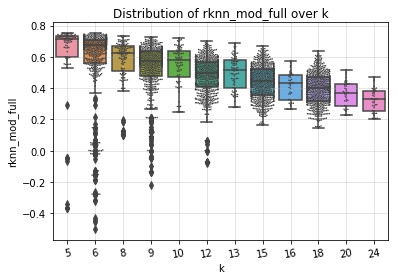

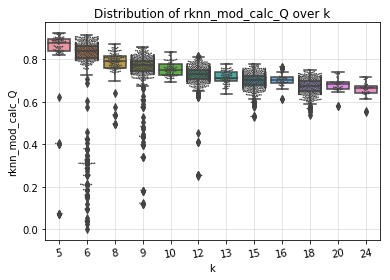

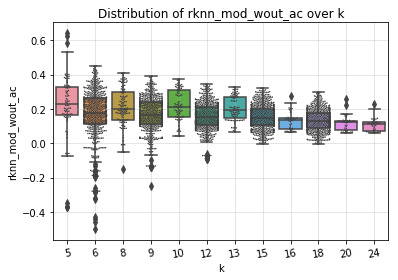

In [10]:
create_plot(df, None, 'k', 'rknn_mod_full')
plt.figure()
create_plot(df, None, 'k', 'rknn_mod_calc_Q')
plt.figure()
create_plot(df, None, 'k', 'rknn_mod_wout_ac')

In [11]:
create_plot(df[(df['hrf_comp'] == False) & (df['dist'] == 'cityblock')], None, 'k', target)

KeyError: 'hrf_comp'

<AxesSubplot:title={'center':'Distribution of modularity over knnparam_gain'}, xlabel='knnparam_gain', ylabel='modularity'>

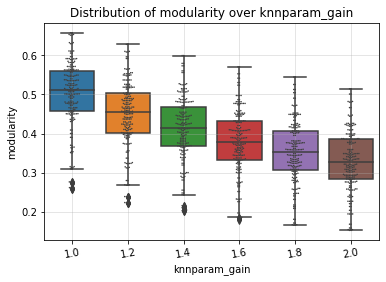

In [73]:
create_plot(df[df['hrf_comp'] == True], None, 'knnparam_gain', target)

<AxesSubplot:title={'center':'Distribution of modularity over knnparam'}, xlabel='knnparam', ylabel='modularity'>

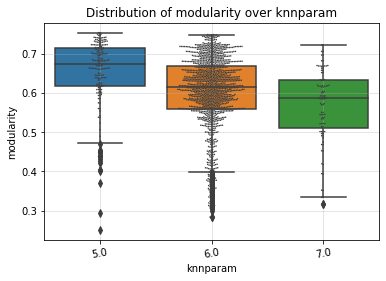

In [24]:
create_plot(df, None, 'knnparam', target)

In [12]:
create_plot(df, None, 'dist', target)
plt.figure()
create_plot(df[df['knnparam_gain'] == 1.0], None, 'dist', target)
plt.figure()
create_plot(df[df['knnparam_gain'] == 1.0], None, 'dist', 'edgs_autocorr')
plt.figure()
create_plot(df[df['knnparam_gain'] == 1.0], None, 'dist', 'modulariy_wout_autocorr')

NameError: name 'target' is not defined

<AxesSubplot:title={'center':'Distribution of modularity over rknn_type'}, xlabel='rknn_type', ylabel='modularity'>

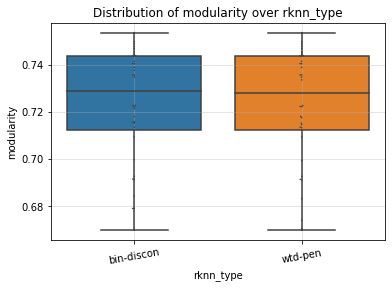

In [38]:
# create_plot(df, None, 'rknn_type', target)

create_plot(df[(df['knnparam_gain'] == 1.0) & (df['dist'] == 'cityblock')], None, 'rknn_type', target)


<AxesSubplot:title={'center':'Distribution of modulariy_wout_autocorr over preproc'}, xlabel='preproc', ylabel='modulariy_wout_autocorr'>

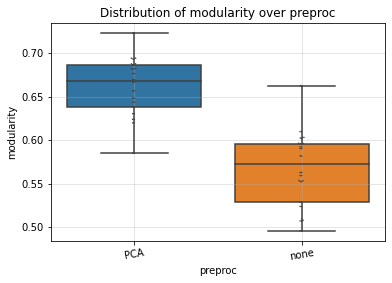

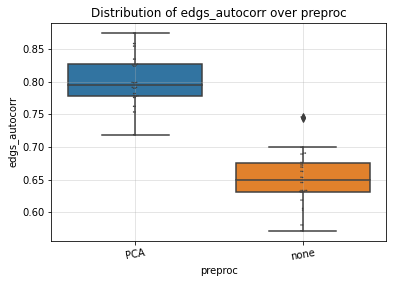

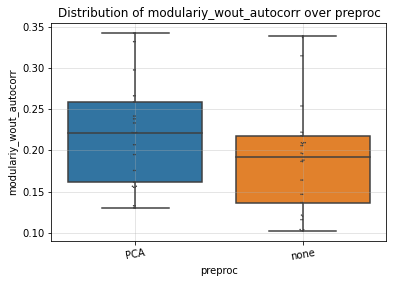

In [35]:
# create_plot(df, None, 'preproc', target)

create_plot(df[(df['knnparam_gain'] == 2.0) & (df['dist'] == 'cityblock')], None, 'preproc', target)
plt.figure()
create_plot(df[(df['knnparam_gain'] == 2.0) & (df['dist'] == 'cityblock')], None, 'preproc', 'edgs_autocorr')
plt.figure()
create_plot(df[(df['knnparam_gain'] == 2.0) & (df['dist'] == 'cityblock')], None, 'preproc', 'modulariy_wout_autocorr')



In [27]:
df

,sbj,ac_pick,preproc,dist,rknn_type,rknn_directed,knnparam_gain,dX_mod_full,dX_mod_calc_Q,rknn_mod_full,rknn_mod_calc_Q,rknn_edg_ac,rknn_mod_wout_ac,rknn_edg_ac2,rknn_mod_wout_ac2,k
0,SBJ01,6.0,PCA99.99,correlation,bin-discon,0.0,1.0,-0.001445,9.865488e-16,0.723859,0.887900,0.921756,0.353138,0.926050,0.327659,6
1,SBJ01,6.0,PCA80,chebychev,bin-discon,0.0,1.0,-0.004256,1.055588e-02,0.515398,0.795340,0.608869,0.113420,0.618533,0.098881,6
2,SBJ01,6.0,none,correlation,bin-discon,0.0,1.0,-0.001497,4.137747e-16,0.724261,0.866711,0.922517,0.381017,0.927226,0.356038,6
3,SBJ01,6.0,PCA90,correlation,bin-discon,0.0,1.0,-0.001558,2.691439e-16,0.690195,0.847903,0.860454,0.286239,0.868180,0.257685,6
4,SBJ01,6.0,PCA95,euclidean,bin-discon,0.0,1.0,-0.004345,1.267559e-15,0.711429,0.859047,0.896806,0.268084,0.902703,0.240141,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,SBJ20,6.0,none,chebychev,wtd-pen,0.0,3.0,-0.001573,4.430965e-03,0.359344,0.598806,0.478631,0.075037,0.485983,0.067334,18
3698,SBJ20,6.0,PCA90,cityblock,wtd-pen,0.0,3.0,-0.004859,1.706494e-16,0.457875,0.671666,0.533007,0.171916,0.540831,0.163623,18
3699,SBJ20,6.0,PCA99.99,cityblock,wtd-pen,0.0,3.0,-0.002914,1.747905e-15,0.527982,0.659189,0.644455,0.209618,0.652163,0.200125,18
3700,SBJ20,6.0,PCA80,cityblock,wtd-pen,0.0,3.0,-0.005333,8.321274e-16,0.372006,0.663840,0.423835,0.136852,0.435260,0.126897,18


In [29]:

def create_plot(df, ax, hparam, target, title=None):
    labels = sorted(list(df[hparam].unique()))
    data = [df[df[hparam] == label][target] for label in labels]
    ax = sns.boxplot(data=data, ax=ax)
    ax = sns.swarmplot(data=data, color=".25", ax=ax, size=1.5)
    ax.set_xticklabels(labels, rotation=10)
#     ax.set_xlabel(hparam)
    ax.set_ylabel(target)
    ax.set_title('Distribution of {} over {}'.format(target,hparam) if not title else title)
    ax.grid(alpha=0.4)
    return ax


In [38]:
sns.set(style = "whitegrid")

max_val = {
    'rknn_mod_full': 0.7567,
    'rknn_mod_wout_ac': 0.7567,
    'rknn_mod_wout_ac2': 0.7567,
}

def display_boxplots(df, H1, H2, knngain, knngains, target='modularity'):
    fig, axs = plt.subplots(nrows=len(H1), ncols=len(H2), figsize=(12,12 * len(H1) / len(H2)))

    vmin = 1.0
    vmax = 0.0
    for axr, (_,hp1) in zip(axs, H1):
        for ax,(_,hp2) in zip(axr, H2):
            for kg in knngains:
                fdf = df[(df['preproc'] == hp1) & (df['rknn_type'] == hp2) & (df['knnparam_gain'] == kg)]
                vmin = min(vmin, np.amin(fdf[target]))
                vmax = max(vmax, np.amax(fdf[target]))
                
    if target in max_val:
        vmax = max_val[target] * 1.05

    for axr, (_,hp1) in zip(axs, H1):
        for ax,(_,hp2) in zip(axr, H2):
            fdf = df[(df['preproc'] == hp1) & (df['rknn_type'] == hp2) & (df['knnparam_gain'] == knngain)]
            ax = create_plot(fdf, ax, 'dist', target, 'Prep {}, rknn type: {}, Kgain {}'.format(hp1,hp2, knngain))
            ax.set_ylim(vmin, vmax)
            if target in max_val:
                ax.axhline(max_val[target], c='r')
        
    plt.tight_layout()
        
    
# target = 'rknn_mod_calc_Q'

targets = ['dX_mod_full', 'rknn_mod_full', 'rknn_mod_calc_Q', 'rknn_edg_ac', 'rknn_mod_wout_ac']
# targets = ['rknn_mod_full', 'rknn_mod_calc_Q',
#            'rknn_edg_ac', 'rknn_mod_wout_ac', 'rknn_edg_ac2', 'rknn_mod_wout_ac2']
kgains = [1.0, 1.5, 2.0, 3.0]

for target in targets:
    for kgain in kgains:
        display_boxplots(df, H1, H2, kgain, kgains, target)
        plt.savefig('{}_{}.png'.format(target, kgain))
#         plt.show()
        plt.close()
#         break
#     break

In [24]:
df['rknn_mod_full']

count    3600.000000
mean        0.484050
std         0.169478
min        -0.499982
25%         0.385657
50%         0.502214
75%         0.607627
max         0.752686
Name: rknn_mod_full, dtype: float64

(-0.5, 2699.5, 1499.5, -0.5)

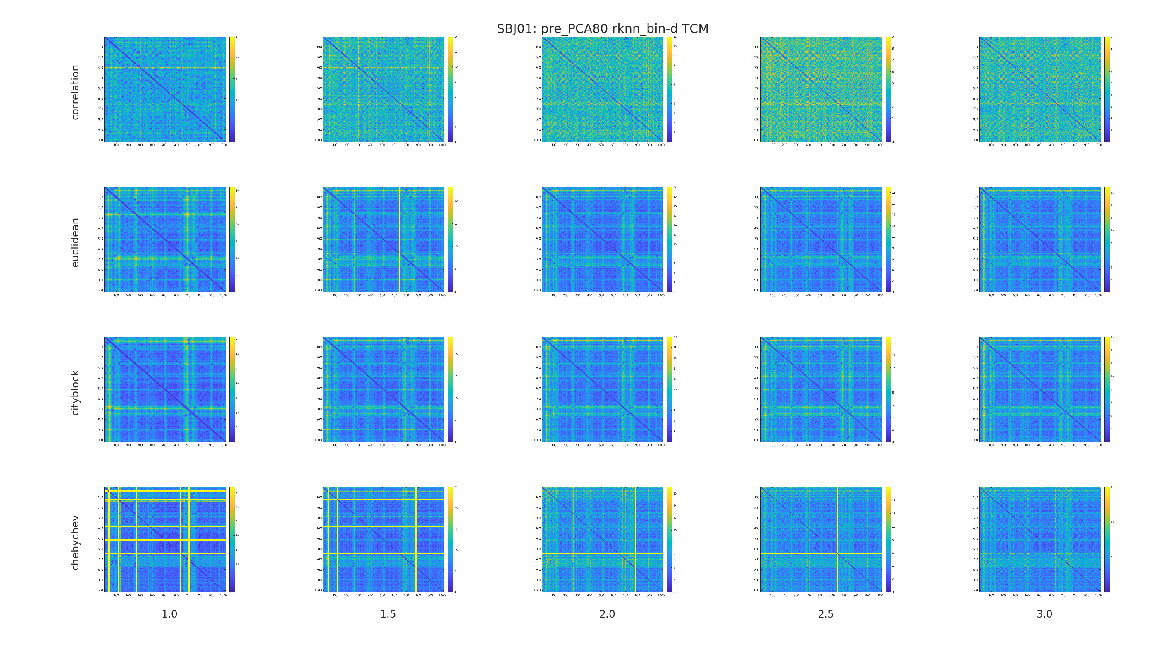

In [53]:

im_res = '/scratch/groups/saggar/mapper/experiments/cme_shine375/CME_mapper2d_data/SBJ01_conf_halfmapper_v2/comb_pre_PCA80_rknn_bin-d_TCM.png'
im = Image.open(im_res)
# im.show()
plt.figure(figsize=(20,20))
plt.imshow(im)
plt.grid(False)
plt.axis('off')

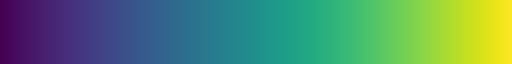

In [29]:
plt.get_cmap()

In [18]:
img = cv.imread('/Users/dh/workspace/BDL/neurolens/experiments/cme_shine375/CME_mapper2d_data/SBJ01_conf_halfmapper_v1/res_SBJ01_pre_non_dist_euc_rknn_bin-d_kgain_1_TCM.png')

In [20]:
img.shape

(875, 1167, 3)

In [21]:
img = cv.imread('/Users/dh/workspace/BDL/neurolens/experiments/cme_shine375/CME_mapper2d_data/SBJ01_conf_halfmapper_v1/res_SBJ01_pre_non_dist_euc_rknn_bin-d_kgain_1.8_TCM.png')
img.shape

(875, 1167, 3)

In [41]:
df

,sbj,knnparam,preproc,dist,rknn_type,rknn_directed,knnparam_gain,modularity,edgs_autocorr,modulariy_wout_autocorr,k
0,SBJ01,6.0,none,euclidean,bin-discon,0.0,1.0,0.712848,0.891879,0.291364,6
1,SBJ01,6.0,PCA,euclidean,bin-discon,0.0,1.0,0.712848,0.891879,0.291364,6
2,SBJ01,6.0,none,correlation,bin-discon,0.0,1.0,0.723161,0.909091,0.429639,6
3,SBJ01,6.0,PCA,correlation,bin-discon,0.0,1.0,0.715313,0.900733,0.355905,6
4,SBJ01,6.0,none,chebychev,bin-discon,0.0,1.0,0.664854,0.832659,0.166442,6
...,...,...,...,...,...,...,...,...,...,...,...
1723,SBJ20,6.0,PCA,correlation,wtd-pen,0.0,2.0,0.544270,0.604070,0.217187,12
1724,SBJ20,6.0,none,chebychev,wtd-pen,0.0,2.0,0.519668,0.587781,0.144772,12
1725,SBJ20,6.0,PCA,chebychev,wtd-pen,0.0,2.0,0.387096,0.420907,0.106600,12
1726,SBJ20,6.0,none,cityblock,wtd-pen,0.0,2.0,0.553655,0.631596,0.186415,12


In [91]:
import os

pdir = '/Users/dh/workspace/BDL/neurolens/experiments/cme_shine375/CME_mapper2d_data'

files = [os.path.join(pdir, fname) for fname in os.listdir(pdir) if fname.startswith('conf_halfmapper_v2_res') and fname.endswith('.csv')]
files = sorted(files)


In [94]:
import csv

results = {}

for fpath in files:
    with open(fpath) as f:
        for j in csv.DictReader(f):
            sbj = j['sbj']
            if sbj not in results:
                results[sbj] = []
            results[sbj].append(j)
            
for k,v in results.items():
    print(k, len(v))

SBJ01 200
SBJ02 200
SBJ03 200
SBJ04 200
SBJ06 200
SBJ07 200
SBJ08 200
SBJ09 200
SBJ10 200
SBJ12 200
SBJ13 200
SBJ14 200
SBJ15 200
SBJ16 247
SBJ17 200
SBJ18 206
SBJ19 200
SBJ20 200


In [98]:
for k,v in results.items():
    for j in v:
        j['id'] = ' '.join([j['preproc'], j['dist'], j['rknn_type'], j['rknn_directed'], j['knnparam_gain']])


['PCA80 chebychev bin-discon 0 1',
 'PCA80 chebychev bin-discon 0 1.5',
 'PCA80 chebychev bin-discon 0 2',
 'PCA80 chebychev bin-discon 0 2.5',
 'PCA80 chebychev bin-discon 0 3',
 'PCA80 chebychev wtd-pen 0 1',
 'PCA80 chebychev wtd-pen 0 1.5',
 'PCA80 chebychev wtd-pen 0 2',
 'PCA80 chebychev wtd-pen 0 2.5',
 'PCA80 chebychev wtd-pen 0 3',
 'PCA80 cityblock bin-discon 0 1',
 'PCA80 cityblock bin-discon 0 1.5',
 'PCA80 cityblock bin-discon 0 2',
 'PCA80 cityblock bin-discon 0 2.5',
 'PCA80 cityblock bin-discon 0 3',
 'PCA80 cityblock wtd-pen 0 1',
 'PCA80 cityblock wtd-pen 0 1.5',
 'PCA80 cityblock wtd-pen 0 2',
 'PCA80 cityblock wtd-pen 0 2.5',
 'PCA80 cityblock wtd-pen 0 3',
 'PCA80 correlation bin-discon 0 1',
 'PCA80 correlation bin-discon 0 1.5',
 'PCA80 correlation bin-discon 0 2',
 'PCA80 correlation bin-discon 0 2.5',
 'PCA80 correlation bin-discon 0 3',
 'PCA80 correlation wtd-pen 0 1',
 'PCA80 correlation wtd-pen 0 1.5',
 'PCA80 correlation wtd-pen 0 2',
 'PCA80 correlation w

In [100]:
sbj1ids = sorted([j['id'] for j in results['SBJ01']])

for k in sorted([j['id'] for j in results['SBJ16']]):
    if k not in sbj1ids:
        print(k)

In [101]:
print(len(sorted([j['id'] for j in results['SBJ16']])))
print(len(sorted([j['id'] for j in results['SBJ01']])))

247
200


In [ ]:
sns.set(style = "whitegrid")

curr_hparam = HPARAMS_START
for idx,hparam_size in enumerate(HPARAMS_PLOTS):
    targets = header[curr_hparam:curr_hparam + hparam_size]
    curr_hparam += hparam_size

    fig,axs = plt.subplots(nrows=len(targets), ncols=len(HPARAMS), figsize=(10*len(HPARAMS), 10*len(targets)))

    for axr, target in zip(axs, targets):
        for ax, hparam in zip(axr, HPARAMS):
            ax = create_plot(df, ax, hparam, target)

    plt.tight_layout()
    plt.savefig(
        os.path.join(
            outdir,
            'hparams_{}-{}.png'.format(fname.replace('.csv', ''), idx)),
        dpi=300)
    plt.close()

In [ ]:
%%capture --no-stdout

for fname, fpath in files: # Or only selected_files
    print(fname)

    df = pd.read_csv(fpath, header=None)
    df.columns = header
    
    sns.set(style = "whitegrid")

    curr_hparam = HPARAMS_START
    for idx,hparam_size in enumerate(HPARAMS_PLOTS):
        targets = header[curr_hparam:curr_hparam + hparam_size]
        curr_hparam += hparam_size

        fig,axs = plt.subplots(nrows=len(targets), ncols=len(HPARAMS), figsize=(10*len(HPARAMS), 10*len(targets)))

        for axr, target in zip(axs, targets):
            for ax, hparam in zip(axr, HPARAMS):
                ax = create_plot(df, ax, hparam, target)

        plt.tight_layout()
        plt.savefig(
            os.path.join(
                outdir,
                'hparams_{}-{}.png'.format(fname.replace('.csv', ''), idx)),
            dpi=300)
        plt.close()

In [ ]:

for fname, fpath in files: # Or only selected_files
    print(fname)

    df = pd.read_csv(fpath, header=None)
    df.columns = header
    C = df.corr()
    
    plt.figure(figsize=(10,10))

    ax = sns.heatmap(C, cmap='PiYG')
    ax.xaxis.tick_top() # x axis on top
    plt.xticks(rotation = 80)
    ax.xaxis.set_label_position('top')

    # plt.savefig("Plotting_Correlation_HeatMap.jpg")
    plt.savefig(os.path.join(outdir, 'corr_hps_{}.png'.format(fname.replace('.csv', ''))))
    plt.close()
    
    C.to_csv(os.path.join(outdir, 'corr_hps_{}'.format(fname)))
    

In [ ]:
rcorrs = {}
all_header = None

for fname, fpath in files: # Or only selected_files
#     fname, fpath = files[0]

    csv_file = os.path.join(outdir, 'corr_hps_{}'.format(fname))

    hh = None
    with open(csv_file) as f:
        for row in csv.reader(f):
            if hh == None:
                hh = row[1+HPARAMS_START:]
                all_header = hh
            else:
                L = row[0]
                if L not in rcorrs:
                    rcorrs[L] = []
#                 print(row)
                rcorrs[L].append([float(r) if r != '' else 0.0 for r in row[1+HPARAMS_START:]])

In [ ]:
HPARAMS

In [ ]:
fig,axs = plt.subplots(nrows=1, ncols=len(HPARAMS), figsize=(10 * len(HPARAMS),10))

for ax, HP in zip(axs, HPARAMS):
    rcorrs[HP]
    HP_df = pd.DataFrame(np.array(rcorrs[HP]), columns=all_header)
    ax = sns.boxplot(data=HP_df, ax=ax)
    ax.set_ylabel('Correlation')
#     ax.set_xticks(rotation = 80)
    ax.set_title('Correlation distribution for {} '.format(HP))
    ax.set_ylim([-1, 1])
    
    props = {"rotation" : 80}
    plt.setp(ax.get_xticklabels(), **props)
    
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'group_corr.png'))

In [ ]:
import math

nrows = 4
ncols = math.ceil(len(all_header) / 4)
fig,axs = plt.subplots(nrows=4, ncols=4, figsize=(30,30))

HPs = ['R', 'K', 'G']

idx = 0
for axr in axs:
    for ax in axr:
        if idx >= len(all_header):
            continue
        target = all_header[idx]
        X = np.array([np.array(rcorrs[hp])[:,idx] for hp in HPARAMS]).T

#         rcorrs[HP]
        target_df = pd.DataFrame(X, columns=HPARAMS)
        ax = sns.boxplot(data=target_df, ax=ax)
        ax.set_ylabel('Correlation')
#         ax.set_xticks(rotation = 80)
        ax.set_title('Correlation distribution for {} '.format(target))
        ax.set_ylim([-1, 1])
        idx += 1
    
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'group_corr_targets.png'))

In [ ]:
len(all_header)